# Matching results from analytical solutions

In [Schuss et al.](https://www.pnas.org/content/104/41/16098) they show that for D = 400, a = 0.1 and v = 1, the mean escape time is 0.00625 s.

We can use this model to test if that is a resonable result

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from PyEscape.escape_plan import escape
from PyEscape.escape_points import fibonacci_spheres, points_on_cube_surface
from PyEscape.escape_utility import sphere_vol_to_r, calculate_delta
from tqdm import tqdm

In [3]:
D = 400
v = 1
a = 0.1
n_pores = 1
pores = fibonacci_spheres(n_pores, v)

N = 100

results = []
for i in tqdm(range(N)):
    results.append(escape(D, v, a, pores, dt=2e-9))

100%|██████████| 100/100 [2:23:03<00:00, 74.12s/it]  


In [4]:
mov_avg = np.cumsum(results)/(1+np.arange(len(results)))

<IPython.core.display.Javascript object>

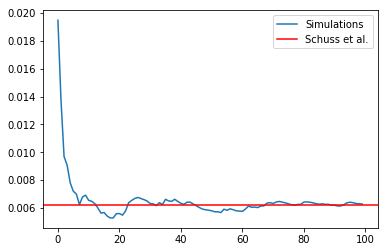

In [5]:
plt.figure()
plt.plot(mov_avg, label='Simulations')
plt.axhline(0.00625, label='Schuss et al.', c='r')
plt.legend()

We can see from the above figure, that for our parameters we can accurately, and quickly arrive at a viable solution to Schuss et al. 

# Visualising escape paths

<IPython.core.display.Javascript object>


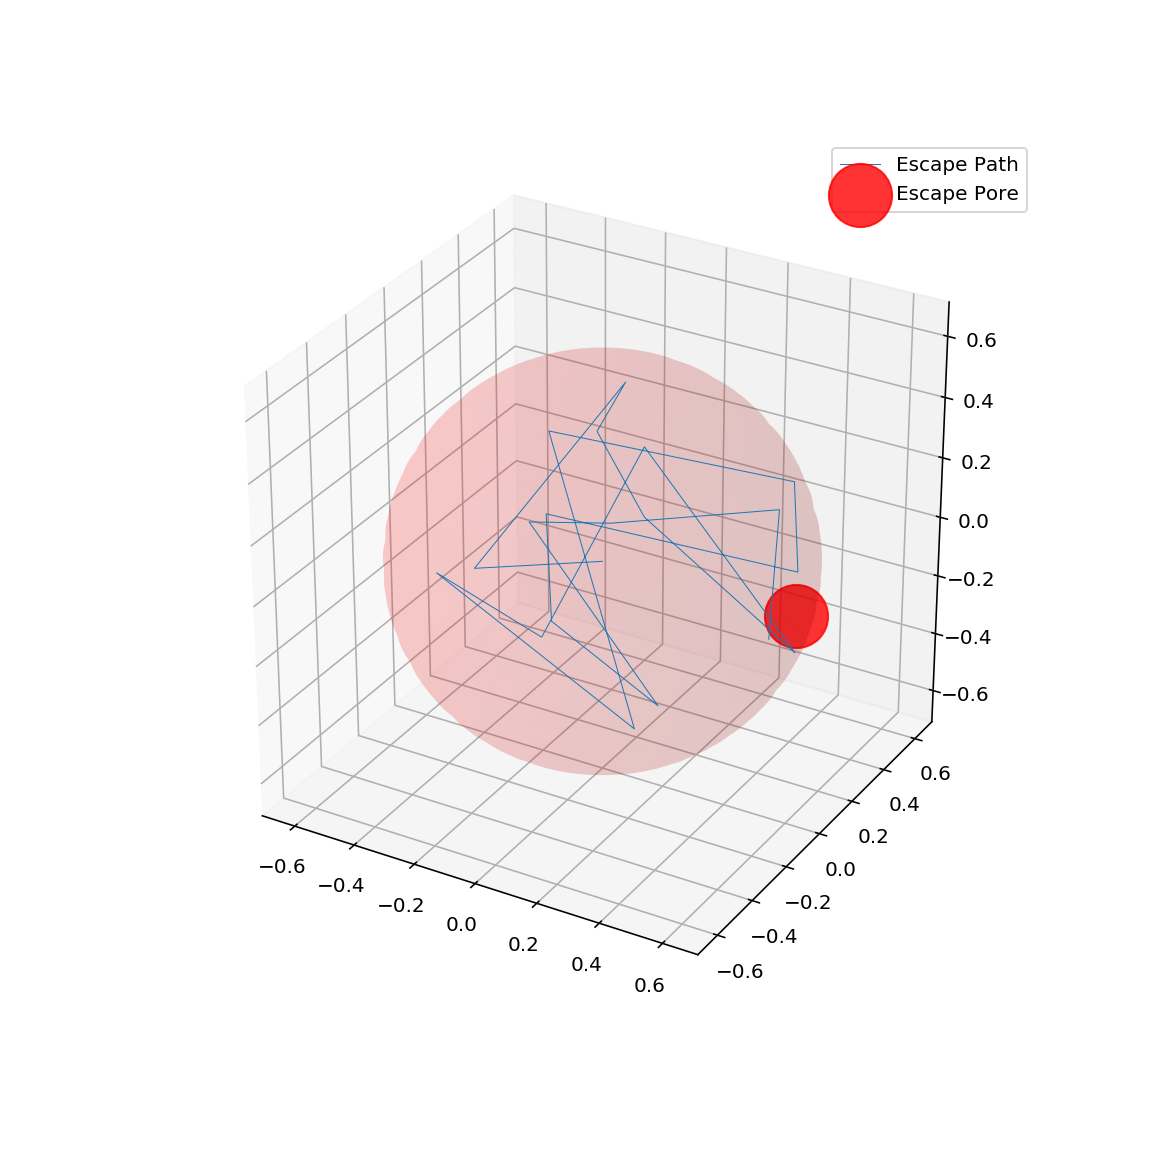

In [8]:
from PyEscape.escape_drawing import draw_sphere

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

values = escape(D, v,a, pores, with_path=True)
ax.plot(np.append(values[:,0][::100],values[:,0][-1] ) ,
        np.append(values[:,1][::100], values[:,1][-1]),
        np.append(values[:,2][::100],values[:,2][-1]),
        alpha=1, linewidth=0.5, label='Escape Path')

draw_sphere(v, ax)

for idx, p in enumerate(pores):
    ax.scatter(p[0], p[1], p[2], c='r', alpha=0.8, s=1000, label='Escape Pore' if idx == 0 else "" )
ax.legend()